In [1]:
import trend_lines.functions as tr 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import test data
data = pd.read_csv("test_data.csv")

In [3]:
tr.helloworld()

Hello world


## Generate Test Data

In [ ]:
import yfinance as yf

def stock_history(ticker: str) -> float:
    stock = yf.Ticker(ticker)
    # Get the current price by accessing the 'history' method
    stock_history = stock.history(period="max")  
    # Get the most recent data for the day
    return stock_history

df = stock_history("AAPL")
df.to_csv("test_data.csv")

### Plot Test Data

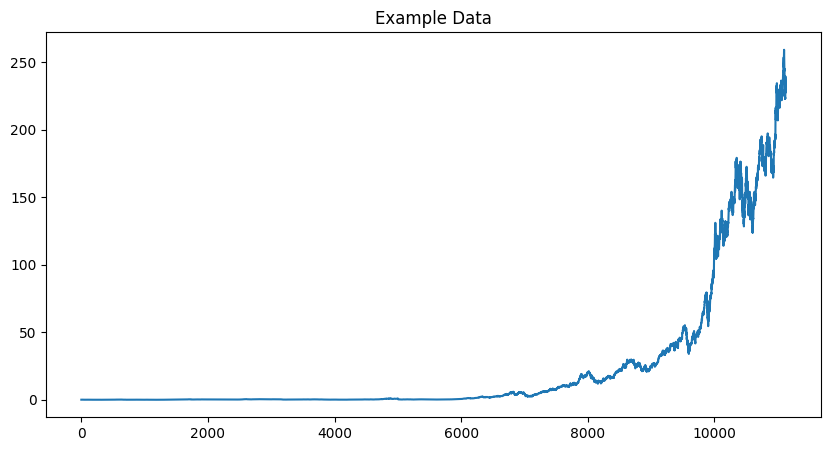

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Example Data")

data["Close"].plot()
plt.show()

## Testing

In [34]:
test_data = data[["Date", "Close"]][:100]

In [35]:
test_data

,Date,Close
0,1980-12-12 00:00:00-05:00,0.098835
1,1980-12-15 00:00:00-05:00,0.093678
2,1980-12-16 00:00:00-05:00,0.086802
3,1980-12-17 00:00:00-05:00,0.088951
4,1980-12-18 00:00:00-05:00,0.091530
...,...,...
95,1981-04-30 00:00:00-04:00,0.097545
96,1981-05-01 00:00:00-04:00,0.097545
97,1981-05-04 00:00:00-04:00,0.097116
98,1981-05-05 00:00:00-04:00,0.096686


In [6]:
test_data = tr.ols_fit(test_data, "Close")

In [11]:
test_data

,Date,Close
0,1980-12-12 00:00:00-05:00,0.098835
1,1980-12-15 00:00:00-05:00,0.093678
2,1980-12-16 00:00:00-05:00,0.086802
3,1980-12-17 00:00:00-05:00,0.088951
4,1980-12-18 00:00:00-05:00,0.091530
...,...,...
95,1981-04-30 00:00:00-04:00,0.097545
96,1981-05-01 00:00:00-04:00,0.097545
97,1981-05-04 00:00:00-04:00,0.097116
98,1981-05-05 00:00:00-04:00,0.096686


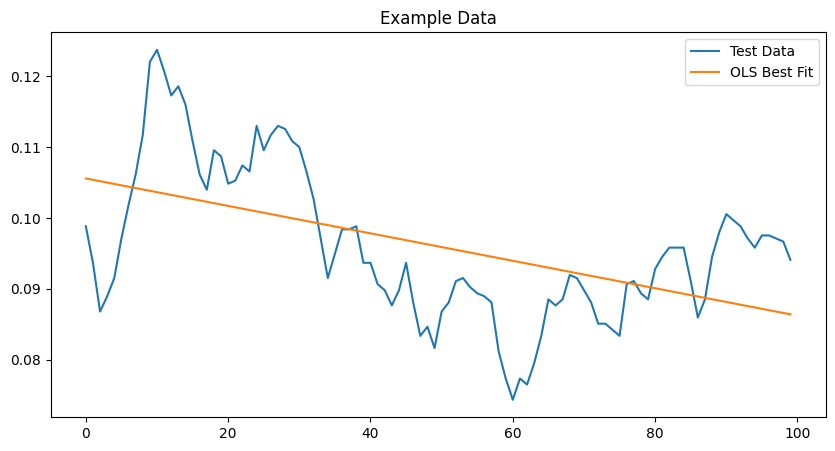

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Example Data")
test_data["Close"].plot(label="Test Data")
test_data["OLS_Fit"].plot(label="OLS Best Fit")
plt.legend()
plt.show()

In [39]:
test_data

,Date,Close
0,1980-12-12 00:00:00-05:00,0.098835
1,1980-12-15 00:00:00-05:00,0.093678
2,1980-12-16 00:00:00-05:00,0.086802
3,1980-12-17 00:00:00-05:00,0.088951
4,1980-12-18 00:00:00-05:00,0.091530
...,...,...
95,1981-04-30 00:00:00-04:00,0.097545
96,1981-05-01 00:00:00-04:00,0.097545
97,1981-05-04 00:00:00-04:00,0.097116
98,1981-05-05 00:00:00-04:00,0.096686


In [ ]:
def sma(df: pd.DataFrame, col_name: str, length: int) -> pd.DataFrame:
    '''Function ingests a dataframe, returns simple moving average values as an additional column in the dataframe
    Args:
    df (pd.DataFrame): The DataFrame ingested  
    col_name (str): The name of the column in the DataFrame holding the data to calculate over
    length (str): The length of the moving average to calculate
    Returns:
    DataFrame with the additional calculated column.
    '''
    if col_name not in df.columns:  # Check whether the column exists in the dataframe
        raise ValueError(f"Column '{col_name}' does not exist in the DataFrame.")
        
    if not np.issubdtype(df[col_name].dtype, np.number):  # Check if the column is numeric
        raise TypeError(f"The column '{col_name}' is not numeric. It must be numeric for SMA calculation.")
        
    df[f"sma_{length}"] = df[col_name].rolling(length).sum() / length   
    return df

In [49]:
sma(test_data, "Dates", 20)

NameError: name 'indep_col' is not defined

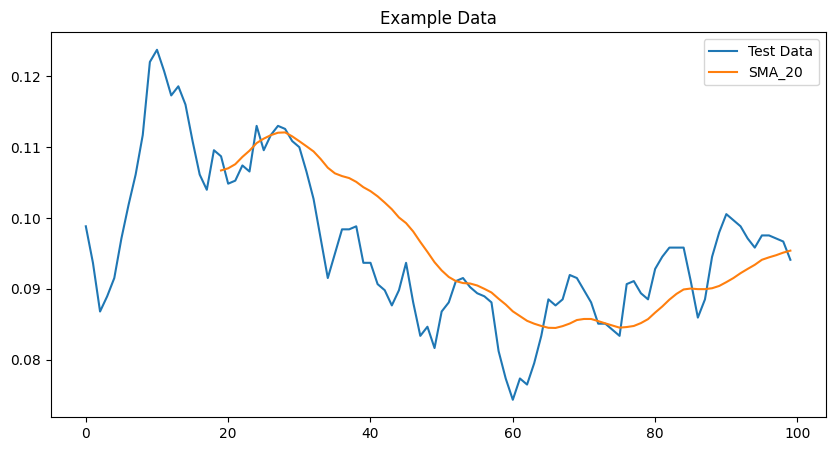

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Example Data")
test_data["Close"].plot(label="Test Data")
test_data["sma_20"].plot(label=f"SMA_20")
plt.legend()
plt.show()